# Import modules


In [92]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import librosa
import librosa.display
from IPython.display import Audio
import warnings
warnings.filterwarnings('ignore')

# Load the dataset


In [52]:
paths = []
labels = []

for dirname, _, filenames in os.walk('../archive/input'):
    for filename in filenames:
        paths.append(os.path.join(dirname, filename))
        label=filename.split('_')[-1]
        label=label.split('.')[0]
        labels.append(label.lower())
print('Dataset loaded')

Dataset loaded


In [53]:
paths[:5]

['../archive/input\\OAF_angry\\OAF_back_angry.wav',
 '../archive/input\\OAF_angry\\OAF_bar_angry.wav',
 '../archive/input\\OAF_angry\\OAF_base_angry.wav',
 '../archive/input\\OAF_angry\\OAF_bath_angry.wav',
 '../archive/input\\OAF_angry\\OAF_bean_angry.wav']

In [54]:
labels[:5]

['angry', 'angry', 'angry', 'angry', 'angry']

In [55]:
#Create a dataframe
df = pd.DataFrame()
df['speech']=paths
df['label']=labels
df.head()

,speech,label
0,../archive/input\OAF_angry\OAF_back_angry.wav,angry
1,../archive/input\OAF_angry\OAF_bar_angry.wav,angry
2,../archive/input\OAF_angry\OAF_base_angry.wav,angry
3,../archive/input\OAF_angry\OAF_bath_angry.wav,angry
4,../archive/input\OAF_angry\OAF_bean_angry.wav,angry


In [56]:
df['label'].value_counts()

ps         800
neutral    800
disgust    800
angry      800
happy      800
fear       800
sad        800
Name: label, dtype: int64

# Exploratory Data Analysis

<AxesSubplot:xlabel='label', ylabel='count'>

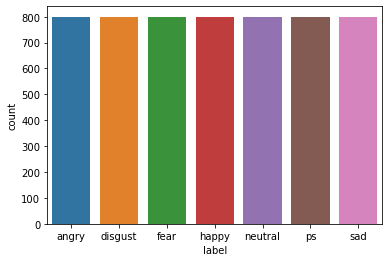

In [57]:
sns.countplot(df['label'])

In [66]:
def waveplot(data, sr, emotion):
    plt.figure(figsize=(10,4))
    plt.title(emotion, size=20)
    librosa.display.waveshow(data, sr=sr)
    plt.show()
    
def spectogram(data, sr, emotion):
    x = librosa.stft(data)
    xdb = librosa.amplitude_to_db(abs(x))
    plt.figure(figsize=(11,4))
    plt.title(emotion, size=20)
    librosa.display.specshow(xdb, sr=sr, x_axis='time', y_axis='hz')
    plt.colorbar()

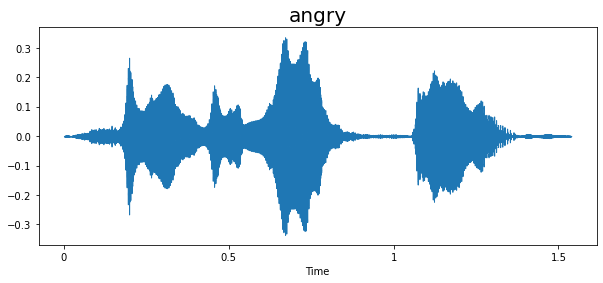

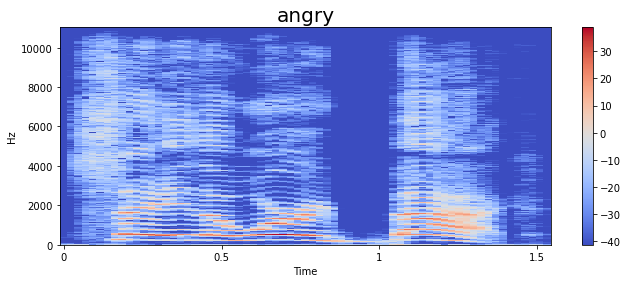

In [68]:
emotion = 'angry'
path = df['speech'][df['label']==emotion][0]
data, sampling_rate= librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

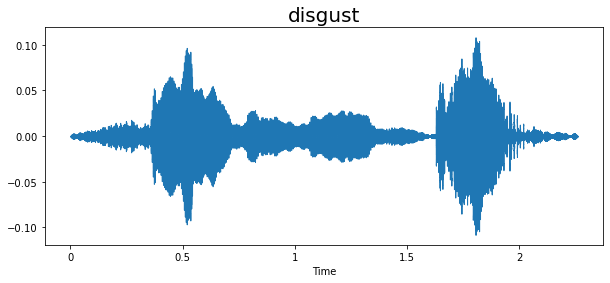

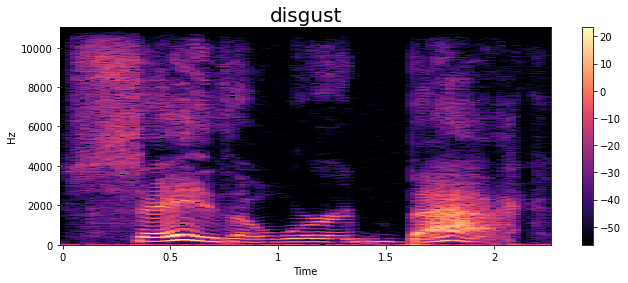

In [70]:
emotion = 'disgust'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate= librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

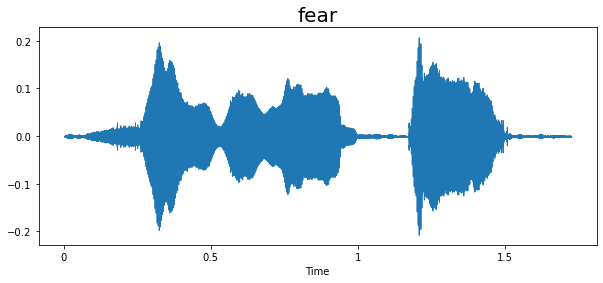

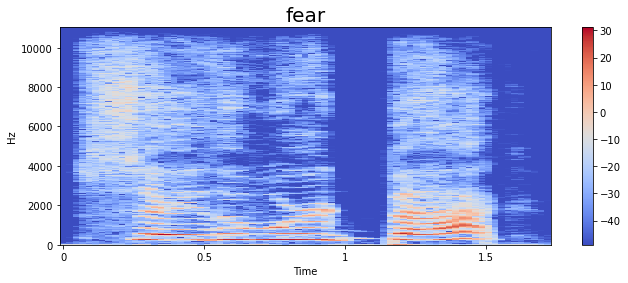

In [71]:
emotion = 'fear'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate= librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

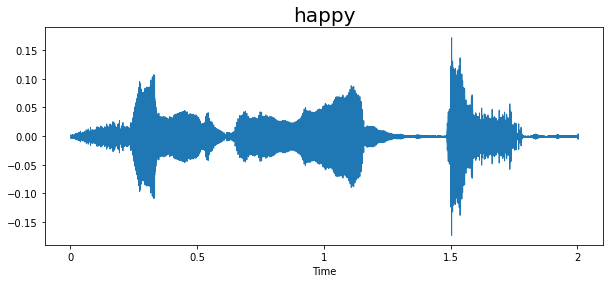

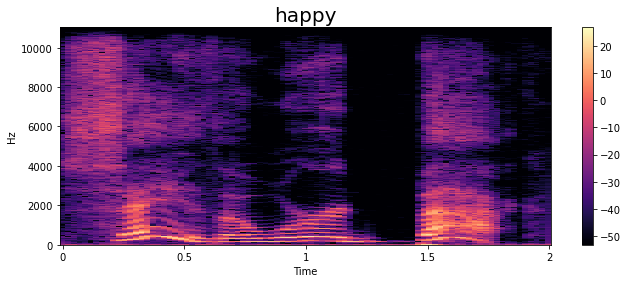

In [72]:
emotion = 'happy'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate= librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

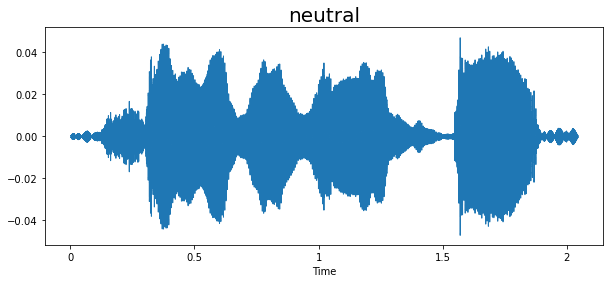

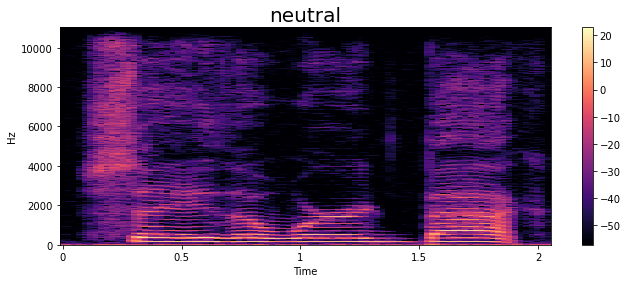

In [73]:
emotion = 'neutral'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate= librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

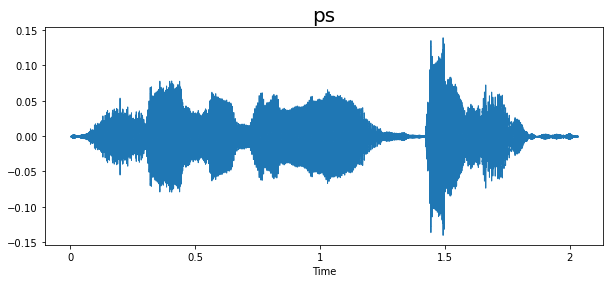

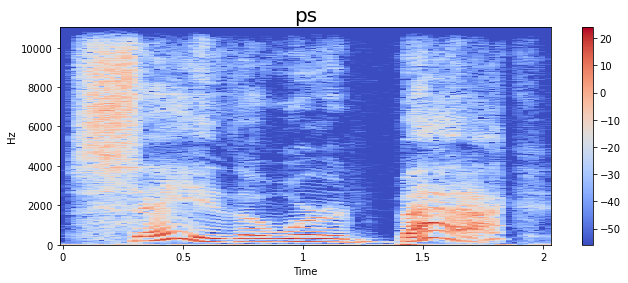

In [74]:
emotion = 'ps'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate= librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

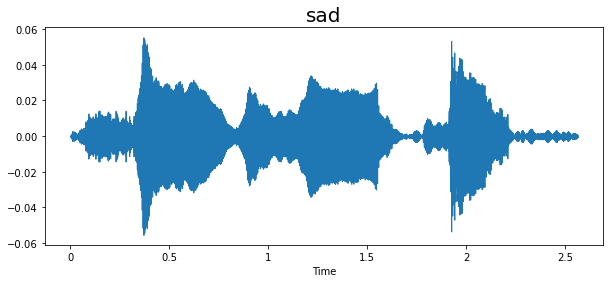

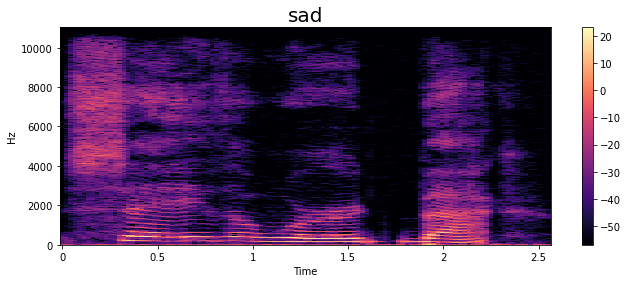

In [75]:
emotion = 'sad'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate= librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

# Feature extraction

In [82]:
def extract_mfcc(filename):
    y, sr = librosa.load(filename, duration=3, offset=0.5)
    mfcc = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40).T, axis=0)
    return mfcc

In [83]:
# Check function
extract_mfcc(df['speech'][0])

array([-3.97214874e+02,  7.77846832e+01, -1.99478245e+01, -2.13016663e+01,
       -2.47878623e+00,  1.04415865e+01, -2.07168369e+01, -5.74857521e+00,
       -7.55554676e+00, -2.10370615e-01, -2.18025589e+00,  5.51623166e-01,
        3.94573897e-01,  1.64459980e+00,  2.57582307e+00,  3.15656734e+00,
       -5.01067924e+00, -4.14153576e+00, -1.90491128e+00, -9.96853924e+00,
       -7.81200552e+00, -1.55172932e+00, -7.26189518e+00,  9.65194511e+00,
        8.14204407e+00,  2.19211063e+01,  1.90227432e+01,  2.05200424e+01,
        1.32593021e+01,  8.48793125e+00,  2.54911721e-01,  5.23840904e+00,
        9.45089054e+00,  5.56163883e+00,  2.41641927e+00, -1.74867523e+00,
        4.80002546e+00,  9.37272930e+00,  2.04265857e+00, -1.87645090e+00],
      dtype=float32)

In [85]:
X_mfcc = df['speech'].apply(lambda x: extract_mfcc(x))

In [89]:
X_mfcc

0       [-397.21487, 77.78468, -19.947824, -21.301666,...
1       [-465.9048, 99.04303, 0.3812126, -32.46538, -1...
2       [-430.20264, 46.719677, 0.9373469, 0.40906996,...
3       [-403.8607, 76.91445, -13.129478, -21.681879, ...
4       [-434.32446, 77.93651, 10.305379, 16.62942, 7....
                              ...                        
5595    [-406.84067, 80.915, 31.92094, 47.126034, -2.2...
5596    [-427.2774, 103.10099, 24.231125, 43.610836, 4...
5597    [-378.90057, 81.49411, 34.707623, 40.347103, -...
5598    [-435.18726, 90.38732, 27.89193, 40.06028, -2....
5599    [-422.2736, 71.34581, 31.815186, 46.311543, 4....
Name: speech, Length: 5600, dtype: object

In [97]:

X = [x for x in X_mfcc]
X = np.array(X)
X.shape
## input split
X = np.expand_dims(X, -1)
X.shape

(5600, 40, 1)

In [98]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
y = enc.fit_transform(df[['label']])
y = y.toarray()
y.shape

(5600, 7)

# Create the model

In [115]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

model = Sequential([
    LSTM(123, return_sequences=False, input_shape=(40,1)),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(7, activation='softmax'),
])
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 123)               61500     
_________________________________________________________________
dense_9 (Dense)              (None, 64)                7936      
_________________________________________________________________
dropout_6 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_10 (Dense)             (None, 32)                2080      
_________________________________________________________________
dropout_7 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_11 (Dense)             (None, 7)                 231       
Total params: 71,747
Trainable params: 71,747
Non-trainable params: 0
__________________________________________________

# Train the model

In [116]:
history = model.fit(X, y, validation_split=0.2, epochs=50, batch_size=64, shuffle=True)

Epoch 1/50
70/70 [==============================] - 2s 14ms/step - loss: 1.2200 - accuracy: 0.5402 - val_loss: 0.6540 - val_accuracy: 0.7634
Epoch 2/50
70/70 [==============================] - 1s 8ms/step - loss: 0.4851 - accuracy: 0.8359 - val_loss: 0.1559 - val_accuracy: 0.9554
Epoch 3/50
70/70 [==============================] - 1s 8ms/step - loss: 0.2495 - accuracy: 0.9281 - val_loss: 0.1344 - val_accuracy: 0.9589
Epoch 4/50
70/70 [==============================] - 1s 8ms/step - loss: 0.1734 - accuracy: 0.9507 - val_loss: 0.0453 - val_accuracy: 0.9857
Epoch 5/50
70/70 [==============================] - 1s 8ms/step - loss: 0.1352 - accuracy: 0.9629 - val_loss: 0.0713 - val_accuracy: 0.9741
Epoch 6/50
70/70 [==============================] - 1s 7ms/step - loss: 0.1288 - accuracy: 0.9627 - val_loss: 0.0723 - val_accuracy: 0.9795
Epoch 7/50
70/70 [==============================] - 1s 8ms/step - loss: 0.1120 - accuracy: 0.9685 - val_loss: 0.0339 - val_accuracy: 0.9875
Epoch 8/50
70/70 [=

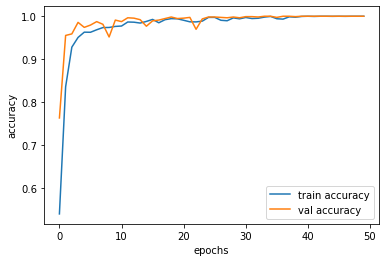

In [117]:
epochs = list(range(50))
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, label='train accuracy')
plt.plot(epochs, val_acc, label='val accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

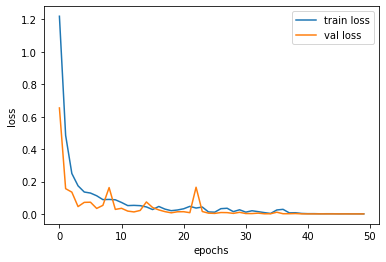

In [118]:
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(epochs, loss, label='train loss')
plt.plot(epochs, val_loss, label='val loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [119]:
model.save('final.h5')